In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation
from subsystem import alpha_extract

In [2]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

big_alpha_Jan = np.loadtxt(open("big_alpha_Jan.txt","rb"), delimiter = ",", skiprows = 0)
big_alpha_May = np.loadtxt(open("big_alpha_May.txt","rb"), delimiter = ",", skiprows = 0)

In [3]:
def compute_prediction(strain_number, alpha_matrix, mu):
    #compute fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for k in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[k][j] = mu*(alpha_matrix[j][k] - alpha_matrix[k][j]) + alpha_matrix[j][k] - alpha_matrix[j][j]
    
    if mu > 4:
        #initial values
        u0 = (1/strain_number)*np.ones(strain_number)
        
        #compute solution of replicator dynamics
        predict_solution = Replicator(strain_number, lambd, 50, u0)
        
    else:
        one = np.ones(strain_number) #vector of all ones
        inv = np.linalg.inv(lambd) #inverse matrix of fitness matrix
        
        #equilibrium of predicted model
        predict_solution = (1/np.matmul(one.T, np.matmul(inv, one)))*np.matmul(inv, one)
    
    return lambd, predict_solution

In [4]:
country = [Iran, Nepal, Brazil, Denmark, Mozambique]
mu_list = [0.93, 3.95, 9.85, 10.23, 16.8]
name_country = ['Iran', 'Nepal', 'Brazil', 'Denmark', 'Mozambique']
big_alpha = [big_alpha_Jan, big_alpha_May]

Q_value = [[], []] #  Q =[Q_Jan, Q_May]


for j in range (0, 2):
    print('-----------------------------------------')
    print(f'Order {j+1}: ')
    for i in range (0, 5):
        print(f'{name_country[i]}: ')
        #extract data for each country
        strain_list = np.array(country[i].strain)
        strain_number = len(strain_list)
    
        #extract alpha matrix from big alpha
        alpha_matrix = alpha_extract(strain_list, big_alpha[j])
        mu = mu_list[i]
        Lambda, z = compute_prediction(strain_number, alpha_matrix, mu)
        
        #compute Q
        Q = np.dot(z.T,np.dot(Lambda,z))
        Q_value[j].append(Q)
        
        print(Q)

-----------------------------------------
Order 1: 
Iran: 
0.3646278853586493
Nepal: 
0.29247952463474813
Brazil: 
0.3395278964420622
Denmark: 
0.3012519898378413
Mozambique: 
0.28391018827917913
-----------------------------------------
Order 2: 
Iran: 
5.310864142851104
Nepal: 
9.523129960494336
Brazil: 
8.629782987565992
Denmark: 
7.874255087583348
Mozambique: 
9.181391016727916


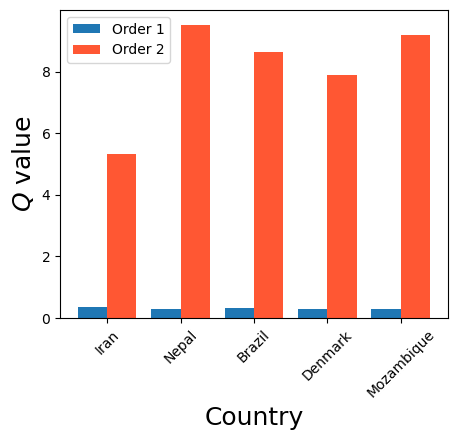

In [9]:
index = np.arange(5)
bar_width = 0.4

fig, ax = plt.subplots(figsize = (5,4))
Jan = ax.bar(index, Q_value[0], bar_width, color = '#1f77b4', label = "Order 1")
May = ax.bar(index + bar_width, Q_value[1], bar_width, color = '#FF5733', label = "Order 2")

ax.set_xlabel('Country', fontsize = 18)
ax.set_ylabel('$Q$ value', fontsize = 18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Iran", "Nepal", "Brazil", "Denmark", "Mozambique"])
ax.tick_params(axis='x', which='major', rotation = 45)

ax.legend()

In [10]:
fig.savefig('Qvalue.png', dpi=300, bbox_inches='tight')